### Problem Statement and Information on Netflix

Netflix is one of the most popular streaming services in the world, providing users with access to a vast collection of TV shows and movies. The platform has gained a massive following in recent years, and its popularity shows no signs of slowing down. We’ll be using Python to perform exploratory data analysis (EDA) on Netflix dataset. We’ll be using various Python libraries, including Pandas, NumPy, Matplotlib, and Seaborn to visualize and analyze the data.

Objective is to gain valuable insights into the content on Netflix. These insights should help Netflix make better decisions about which type of shows/movies to produce and how they can grow the business in different countries.

### Importing Libraries and loading the dataset

In [1237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1238]:
data = pd.read_csv(r"C:\Users\n.rahman\OneDrive - BALADNA\Desktop\BALADNA\Ex Docs\SCALER-DSML\Module 6 - DAV - Pandas\netflix.csv")

In [1239]:
data.shape

(8807, 12)

In [1240]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4116,s4117,TV Show,Velvet Colección,NaN,"Marta Hazas, Asier Etxeandía, Adrián Lastra, D...",Spain,"February 14, 2019",2018,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In the late '60s, fashion designer Ana enlists..."
264,s265,Movie,Walk of Shame,Steve Brill,"Elizabeth Banks, James Marsden, Gillian Jacobs...",United States,"August 16, 2021",2014,R,94 min,"Comedies, Independent Movies","After a night of boozy carousing, a local news..."
4190,s4191,Movie,Pandigai,Feroz,"Kreshna, Anandhi, Saravanan, Madhusudhanan, Bl...",India,"January 15, 2019",2017,TV-MA,125 min,"Action & Adventure, Dramas, International Movies",Looking for a way out of his impoverished life...
1191,s1192,Movie,The Fluffy Movie,"Manny Rodriguez, Jay Lavender",Gabriel Iglesias,United States,"March 18, 2021",2014,PG-13,101 min,Stand-Up Comedy,Comedian Gabriel Iglesias takes the stage in S...
5375,s5376,Movie,Buddy Thunderstruck: The Maybe Pile,Harry Chaskin,"Brian Atkinson, Ted Raimi, Harry Chaskin, Debi...",United States,"July 14, 2017",2017,TV-Y7,14 min,"Children & Family Movies, Comedies",Champion truck-racing dog Buddy and his best f...


In [1241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Observation : Structure of Dataset

Columns such as director, cast,country,listed_in values are stored together separated by comma. i.e multiple values separated by comma. So for us to analyse the data by a indivdual director or by cast or by listed in then we need to split the data in such a way that we can filter and analyse the data accordingly as required. So lets do the job of spliting all this columns and stack this rows vertically.

#### So lets do this task for director column first

In [1246]:
#This part of the code splits the "director"column by comma (',') into a list format and convert to a df with title as index
director_split = pd.DataFrame(data["director"].apply(lambda x:str(x).split(", ")).tolist(),index=data["title"])

#stack():This method "stacks" the columns of the DataFrame on top of each other, effectively converting the DataFrame into a Series with a multi-level index.
#followed by we reset_index
director_split = director_split.stack().reset_index()

#drop the unwanted column
director_split.drop("level_1",inplace=True,axis=1)

#renaming the column accordignly
director_split.rename({0:"director"},axis=1,inplace=True)
director_split

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [1247]:
director_split.info() #indicating no null values which is wrong as nan is converted into string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9612 non-null   object
 1   director  9612 non-null   object
dtypes: object(2)
memory usage: 150.3+ KB


In [1248]:
#if you notice the nan is converted into string so its showing in value counts. normally real nan is not shows in value_counts
director_split["director"].value_counts()

director
nan               2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: count, Length: 4994, dtype: int64

In [1249]:
#replace all nan string values as "NaN"
director_split["director"].replace("nan",np.nan,inplace=True)


In [1250]:
director_split["director"].value_counts()

director
Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: count, Length: 4993, dtype: int64

#### DONE for the director column. now need to apply the same for country,cast and listedin columns

### splitting listedin

In [1251]:
listedin_split = pd.DataFrame(data["listed_in"].apply(lambda x:str(x).split(", ")).tolist(),index=data["title"])
listedin_split = listedin_split.stack().reset_index()
listedin_split.drop("level_1",inplace=True,axis=1)
listedin_split.rename({0:"listed_in"},axis=1,inplace=True)
listedin_split["listed_in"].replace("nan",np.nan,inplace=True)
listedin_split

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


### splitting country

In [1252]:
country_split = pd.DataFrame(data["country"].apply(lambda x:str(x).split(", ")).tolist(),index=data["title"])
country_split = country_split.stack().reset_index()
country_split.drop("level_1",inplace=True,axis=1)
country_split.rename({0:"country"},axis=1,inplace=True)
country_split["country"].replace("nan",np.nan,inplace=True)
country_split

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,NaN
10842,Zombieland,United States
10843,Zoom,United States


### splitting cast

In [1253]:
cast_split = pd.DataFrame(data["cast"].apply(lambda x:str(x).split(", ")).tolist(),index=data["title"])
cast_split = cast_split.stack().reset_index()
cast_split.drop("level_1",inplace=True,axis=1)
cast_split.rename({0:"cast"},axis=1,inplace=True)
cast_split["cast"].replace("nan",np.nan,inplace=True)
cast_split

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


## Merging all the dataframe splitted based on the common field "title"

In [1254]:
#merging listerin and country split dataframe into one. 
merge_listedin_country = pd.merge(listedin_split,country_split,how="inner", on ="title")

In [1255]:
merge_listedin_country.head()

,title,listed_in,country
0,Dick Johnson Is Dead,Documentaries,United States
1,Blood & Water,International TV Shows,South Africa
2,Blood & Water,TV Dramas,South Africa
3,Blood & Water,TV Mysteries,South Africa
4,Ganglands,Crime TV Shows,NaN


In [1256]:
#merging cast and director split dataframe into one.
merge_cast_director = pd.merge(director_split,cast_split,how="inner",on="title")
merge_cast_director.head()

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,NaN
1,Blood & Water,NaN,Ama Qamata
2,Blood & Water,NaN,Khosi Ngema
3,Blood & Water,NaN,Gail Mabalane
4,Blood & Water,NaN,Thabang Molaba


### merging all dataframe into one

In [1257]:
merge_all = pd.merge(merge_listedin_country,merge_cast_director, how="inner", on="title")

In [1258]:
merge_all.sample(10)

,title,listed_in,country,director,cast
6917,Takizawa Kabuki ZERO 2020 The Movie,International Movies,NaN,Hideaki Takizawa,Raul
33700,Kilometers and Kilometers,Independent Movies,India,Jeo Baby,Joju George
18281,Millennials,Romantic TV Shows,Argentina,NaN,Chang Sung Kim
167086,Lockout,Action & Adventure,France,James Mather,Joseph Gilgun
191873,The Iron Lady,International Movies,United Kingdom,Phyllida Lloyd,David Westhead
95795,Your Son,Dramas,France,Miguel Ángel Vivas,Ana Wagener
110387,The Could’ve-Gone-All-the-Way Committee,Romantic TV Shows,Japan,NaN,Yosuke Sugino
183461,Socha Na Tha,Romantic Movies,India,Imtiaz Ali,Rati Agnihotri
73201,Ghost Stories,Horror Movies,India,Zoya Akhtar,Sobhita Dhulipala
156169,Grand Masti,Music & Musicals,India,Indra Kumar,Bruna Abdullah


## Now lets merge with the original dataframe to get all other attributes along with the merged one.

In [1259]:
data_final = pd.merge(data[["show_id","type","date_added","release_year","rating","duration","description","title"]],merge_all,how="inner",on="title")
data_final.head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
0,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentaries,United States,Kirsten Johnson,NaN
1,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Ama Qamata
2,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Khosi Ngema
3,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Gail Mabalane
4,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Thabang Molaba


In [1260]:
data_final.shape

(201991, 12)

In [1261]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   date_added    201833 non-null  object
 3   release_year  201991 non-null  int64 
 4   rating        201924 non-null  object
 5   duration      201988 non-null  object
 6   description   201991 non-null  object
 7   title         201991 non-null  object
 8   listed_in     201991 non-null  object
 9   country       190094 non-null  object
 10  director      151348 non-null  object
 11  cast          199845 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


### Checking for null values and duplicates

#### Checking for duplicates and dropping

In [1262]:
data_final.duplicated().sum()

55

In [1263]:
data_final.loc[data_final.duplicated()].head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
39336,s1632,Movie,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...,Rust Creek,Thrillers,United States,Jen McGowan,Micah Hauptman
88476,s3719,Movie,"June 21, 2019",2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Blood Will Tell,Dramas,Argentina,Miguel Cohan,Oscar Martínez
88477,s3719,Movie,"June 21, 2019",2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Blood Will Tell,Dramas,Argentina,Miguel Cohan,Dolores Fonzi
88478,s3719,Movie,"June 21, 2019",2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Blood Will Tell,Dramas,Argentina,Miguel Cohan,Diego Velázquez
88479,s3719,Movie,"June 21, 2019",2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Blood Will Tell,Dramas,Argentina,Miguel Cohan,Paulina Garcia


#### dropping the duplicate rows

In [1264]:
data_final = data_final.drop_duplicates()

In [1265]:
data_final.duplicated().sum()

0

In [1266]:
data_final.loc[data_final.duplicated()]

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast


In [1267]:
data_final.reset_index(drop=True,inplace=True)

In [1268]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201936 non-null  object
 1   type          201936 non-null  object
 2   date_added    201778 non-null  object
 3   release_year  201936 non-null  int64 
 4   rating        201869 non-null  object
 5   duration      201933 non-null  object
 6   description   201936 non-null  object
 7   title         201936 non-null  object
 8   listed_in     201936 non-null  object
 9   country       190039 non-null  object
 10  director      151293 non-null  object
 11  cast          199790 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


#### checking for null values and filling accordingly

In [1269]:
#to filter all colums rows with null values
data_final.loc[data_final.isnull().any(axis=1)].head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
0,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentaries,United States,Kirsten Johnson,NaN
1,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Ama Qamata
2,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Khosi Ngema
3,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Gail Mabalane
4,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,NaN,Thabang Molaba


In [1270]:
data_final.isnull().sum()

show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
description         0
title               0
listed_in           0
country         11897
director        50643
cast             2146
dtype: int64

In [1271]:
#replacing the director and cast columns missing value.
data_final["director"].fillna("Unknown Director",inplace=True)
data_final["cast"].fillna("Unknown Cast",inplace=True)

In [1272]:
data_final.isnull().sum()

show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
description         0
title               0
listed_in           0
country         11897
director            0
cast                0
dtype: int64

#### Handling the missing values in date_added

- Add a default date as date_added and release year is in different date format.
- Join the default date with the release year to match with the format of date_added

In [1273]:
data_final.head() #you see date_added and release_year is of different format

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
0,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentaries,United States,Kirsten Johnson,Unknown Cast
1,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Ama Qamata
2,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Khosi Ngema
3,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Gail Mabalane
4,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Thabang Molaba


In [1274]:
data_final.loc[data_final["date_added"].isnull()].head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
136838,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories,British TV Shows,United Kingdom,Unknown Director,Daniel Radcliffe
136839,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories,British TV Shows,United Kingdom,Unknown Director,Jon Hamm
136840,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories,British TV Shows,United Kingdom,Unknown Director,Adam Godley
136841,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories,British TV Shows,United Kingdom,Unknown Director,Christopher Godwin
136842,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories,British TV Shows,United Kingdom,Unknown Director,Rosie Cavaliero


In [1275]:
#filling the missing values of date_added column with release year. 
default_date = "January 01,"
data_final["date_added"].fillna(default_date + data_final["release_year"].astype(str),inplace=True)

In [1276]:
data_final.loc[data_final["date_added"].isnull()]

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast


In [1277]:
data_final.isnull().sum()

show_id             0
type                0
date_added          0
release_year        0
rating             67
duration            3
description         0
title               0
listed_in           0
country         11897
director            0
cast                0
dtype: int64

#### Handling the rating and duration missing values

In [1278]:
data_final.loc[data_final["duration"].isnull()]

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
126488,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K. 2017,Movies,United States,Louis C.K.,Louis C.K.
131554,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.: Hilarious,Movies,United States,Louis C.K.,Louis C.K.
131688,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.: Live at the Comedy Store,Movies,United States,Louis C.K.,Louis C.K.


#### It looks like a data entry mistake as the rating is filled with duration values and rating should be null.

In [1279]:
#replacing the duration column with values of rating. 

data_final["duration"].fillna(data_final["rating"], inplace=True)

In [1280]:
data_final.loc[data_final["duration"].isnull()] 

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast


In [1281]:
data_final.isnull().sum()

show_id             0
type                0
date_added          0
release_year        0
rating             67
duration            0
description         0
title               0
listed_in           0
country         11897
director            0
cast                0
dtype: int64

#### Now replace those rating values as null by using mask concept

In [1282]:
mask = (data_final['rating'] == '74 min') | (data_final['rating'] == '84 min') | (data_final['rating'] == '66 min')
mask

0         False
1         False
2         False
3         False
4         False
          ...  
201931    False
201932    False
201933    False
201934    False
201935    False
Name: rating, Length: 201936, dtype: bool

In [1283]:
data_final.loc[mask, 'rating'] = np.nan

In [1284]:
data_final["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### Lets work on rating null values

In [1285]:
data_final.isnull().sum()

show_id             0
type                0
date_added          0
release_year        0
rating             70
duration            0
description         0
title               0
listed_in           0
country         11897
director            0
cast                0
dtype: int64

In [1286]:
#check among null values of rating which type is more?
data_final.loc[data_final["rating"].isnull()]["type"].value_counts()

type
TV Show    58
Movie      12
Name: count, dtype: int64

In [1287]:
#from the data_final. check by grouping type and rating which is have more counts to replace those with null values
data_final.groupby(["type","rating"])["rating"].count()

type     rating  
Movie    G            1530
         NC-17         149
         NR           1418
         PG          10919
         PG-13       16246
         R           25805
         TV-14       29234
         TV-G         1738
         TV-MA       43913
         TV-PG       10312
         TV-Y         1878
         TV-Y7        2486
         TV-Y7-FV       62
         UR             86
TV Show  NR            155
         R              54
         TV-14       14691
         TV-G         1041
         TV-MA       29906
         TV-PG        4614
         TV-Y         1787
         TV-Y7        3818
         TV-Y7-FV       24
Name: rating, dtype: int64

### INSIGHT:

- So from the above grouping result, we notice that from the "Movie" type, TV-MA is the most common rating. 
- From the "TV show" type, TV-MA is the most common rating as well 
- So for the missing null values of rating column, we will replace those values with most common rating based on the type of show.

In [1288]:
#lets do for the movie type first using masking

condition1 = (data_final["type"] =="Movie") & (data_final["rating"].isnull())
data_final.loc[condition1,"rating"] = "TV-MA"


In [1289]:
#lets do for the TV show type 

condition2 = (data_final["type"]=="TV Show") & (data_final["rating"].isnull())
data_final.loc[condition2,"rating"] = "TV-MA"

In [1290]:
data_final.isnull().sum()

show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
description         0
title               0
listed_in           0
country         11897
director            0
cast                0
dtype: int64

### Moving onto the country column null values and handling them

In [1291]:
data_final["country"].isnull().sum()

11897

####  Replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data. Majority of show country is from US, so we replace with the same instead dropping the column

In [1292]:
data_final["country"].value_counts()

country
United States     59324
India             22814
United Kingdom    12945
Japan              8679
France             8252
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: count, Length: 127, dtype: int64

In [1293]:
data_final["country"].fillna("United States",inplace=True)

In [1294]:
data_final["country"].isnull().sum()

0

*************************************************************************************************************************

## Basic EDA  - shape,info, basic stats, attributes value counts

In [1295]:
data_final.shape

(201936, 12)

In [1296]:
len(data_final)

201936

In [1297]:
data_final.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201936 non-null  object
 1   type          201936 non-null  object
 2   date_added    201936 non-null  object
 3   release_year  201936 non-null  int64 
 4   rating        201936 non-null  object
 5   duration      201936 non-null  object
 6   description   201936 non-null  object
 7   title         201936 non-null  object
 8   listed_in     201936 non-null  object
 9   country       201936 non-null  object
 10  director      201936 non-null  object
 11  cast          201936 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [1298]:
data_final["release_year"].min()

1925

In [1299]:
data_final["release_year"].max()

2021

In [1300]:
data_final["date_added"].min()

' April 15, 2018'

In [1301]:
data_final["date_added"].max()

'September 9, 2021'

In [1302]:
data_final.columns

Index(['show_id', 'type', 'date_added', 'release_year', 'rating', 'duration',
       'description', 'title', 'listed_in', 'country', 'director', 'cast'],
      dtype='object')

In [1303]:
data_final["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [1304]:
data_final["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [1305]:
data_final["listed_in"].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [1306]:
data_final["listed_in"].value_counts().head()

listed_in
Dramas                    29756
International Movies      28192
Comedies                  20829
International TV Shows    12845
Action & Adventure        12216
Name: count, dtype: int64

In [1307]:
data_final["country"].value_counts().head()

country
United States     71221
India             22814
United Kingdom    12945
Japan              8679
France             8252
Name: count, dtype: int64

**************************************************************************************************************************

# Data Analysis & Visualization

In [1308]:
unique_shows = data_final.groupby("type")["show_id"].nunique().reset_index()
unique_shows

,type,show_id
0,Movie,6131
1,TV Show,2676


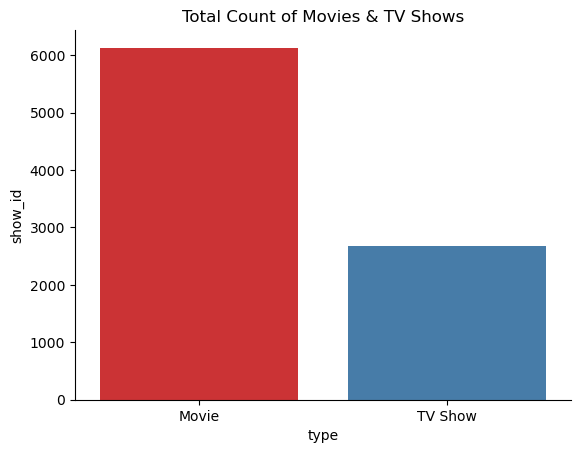

In [1311]:
sns.barplot(x="type", y="show_id", data=unique_shows, palette='Set1')
sns.despine()
plt.title("Total Count of Movies & TV Shows")
plt.show()

### INSIGHTS - Plot 1- It shows the number of Movies and TV shows present in the dataset. The plot shows that there are more Movies than TV shows in the given Netflix dataset.

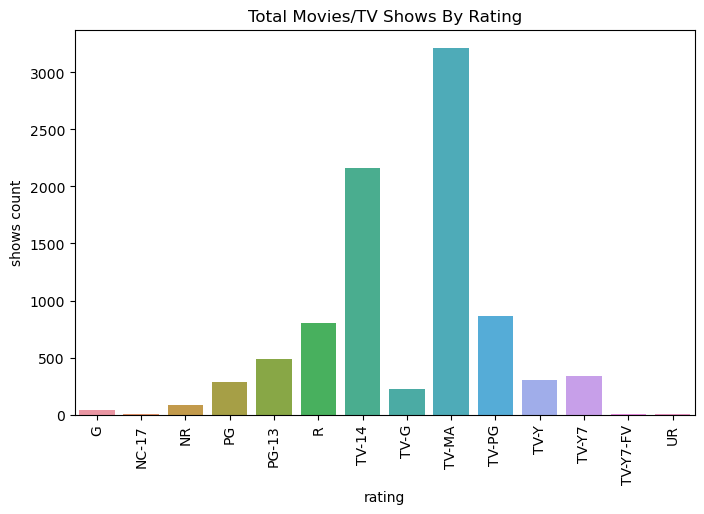

In [1312]:
shows_by_rating = data_final.groupby("rating")["show_id"].nunique().reset_index()
plt.figure(figsize=(8,5))
plt.title("Total Movies/TV Shows By Rating")
sns.barplot(x="rating",y ="show_id", data=shows_by_rating)
plt.xticks(rotation=90)
plt.ylabel("shows count")
plt.show()

###  INSIGHTS Plot 2- It shows the number of  unique shows by ‘rating’ column. The plot shows that the most frequent rating in the dataset is TV-MA, followed by TV-14, TV-PG and R.

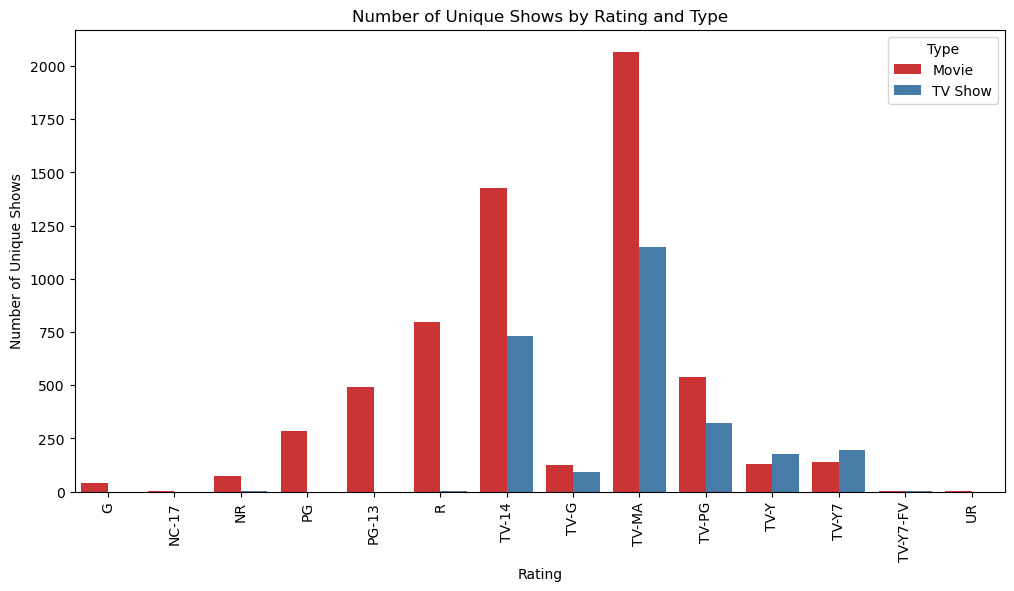

In [1313]:
shows_by_rating_type = data_final.groupby(["rating","type"])["show_id"].nunique().reset_index()
plt.figure(figsize=(12, 6))
plt.title("Number of Unique Shows by Rating and Type")
sns.barplot(x="rating", y="show_id", hue="type", data=shows_by_rating_type, palette='Set1')
plt.xlabel('Rating')
plt.ylabel('Number of Unique Shows')
plt.xticks(rotation=90)
plt.legend(title="Type",loc ="upper right")  
plt.show()

### INSIGHTS Plot 3- is a bar plot of the ‘rating’ column of the DataFrame, with the hue set to the ‘type’ column. This plot shows the number of occurrences of each unique value in the ‘rating’ column, broken down by the type of content (i.e., Movie or TV show). This plot allows us to see how the distribution of ratings differs between Movies and TV shows. We can see that the rating TV-MA is more common in movies than tv shows followed by TV-14

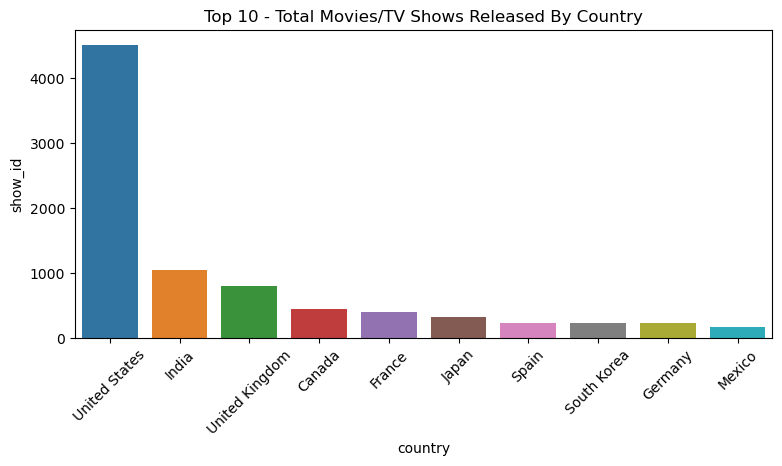

In [1315]:
shows_by_country = data_final.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
shows_by_country
plt.figure(figsize=(9,4))
plt.title("Top 10 - Total Movies/TV Shows Released By Country")
sns.barplot(x="country",y="show_id", data=shows_by_country)
plt.xticks(rotation=45)
plt.show()

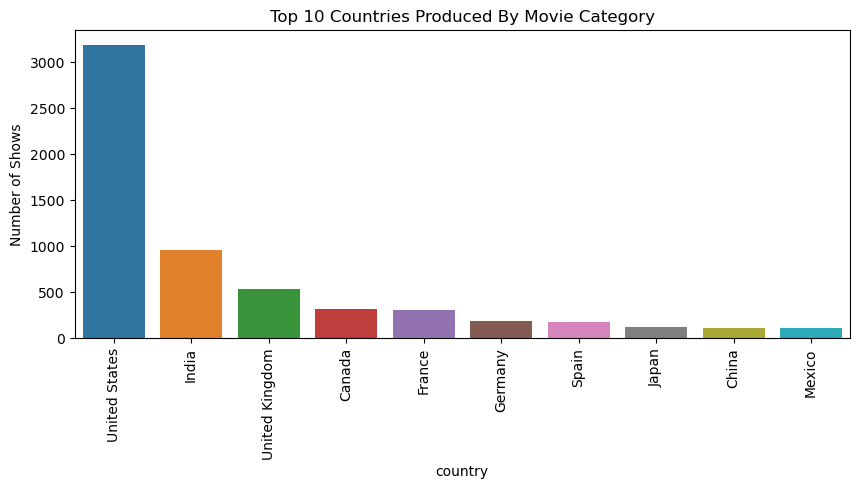

In [1316]:
top10_country_movies = data_final.loc[data_final["type"]=="Movie"]
top10_country_movies = top10_country_movies.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="country",y="show_id",data = top10_country_movies )
plt.title("Top 10 Countries Produced By Movie Category")
plt.xticks(rotation=90)
plt.ylabel("Number of Shows")
plt.show()

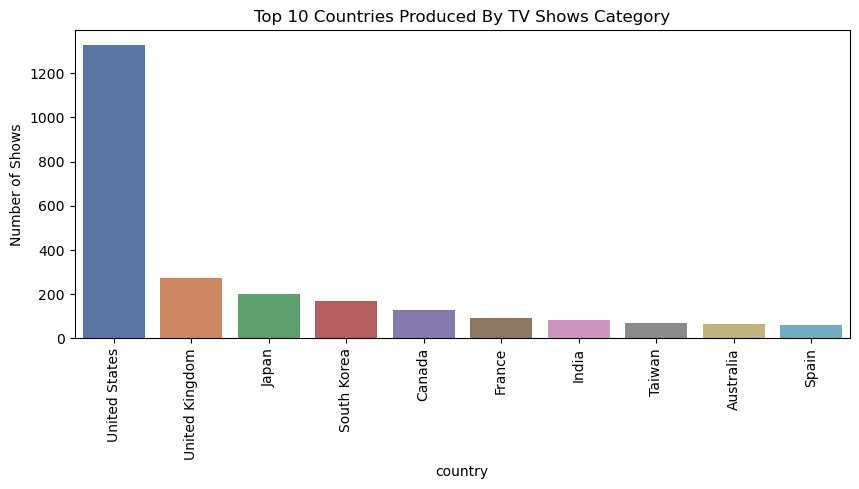

In [1317]:
top10_country_tvshows = data_final.loc[data_final["type"]=="TV Show"]
top10_country_tvshows = top10_country_tvshows.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="country",y="show_id",data = top10_country_tvshows, palette = "deep" )
plt.title("Top 10 Countries Produced By TV Shows Category")
plt.xticks(rotation=90)
plt.ylabel("Number of Shows")
plt.show()

### INSIGHTS Plot 4-  This plot shows the top 10 ‘country’ with most shows (i.e., Movie and TV show together). This plot allows us to see US have more number of shows followed by India, UK and others. The below subplots shows the breakup by top 10 countries produced by type of movie and tv shows category as well. In both category US dominates followed by India in movie category and UK in TV shows. 

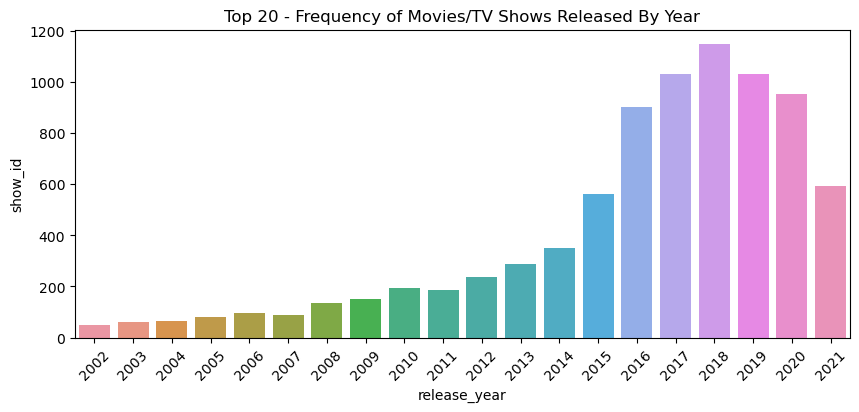

In [1318]:
shows_by_year = data_final.groupby("release_year")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(20)
plt.figure(figsize=(10,4))
plt.title("Top 20 - Frequency of Movies/TV Shows Released By Year")
sns.barplot(x="release_year",y="show_id", data=shows_by_year)
plt.xticks(rotation=45)
plt.show()

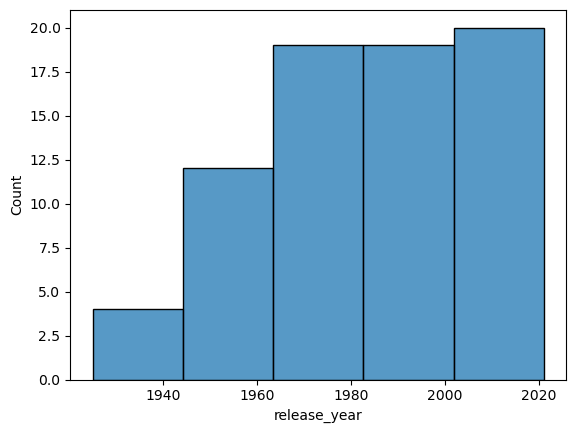

In [929]:
all_years = data_final.groupby("release_year")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)
sns.histplot(all_years["release_year"], bins =5)
plt.show()

### INSIGHTS Plot 5 - This bar plot shows the frequency of Movies & TV shows released in different years. The plot shows the 20 most common years with the count of Movies & TV shows together for each year shown on the y-axis. 2018 is the year where most number of movies and shows being released followed by others. So from the plot its evident that from 2015 onwards more number of shows started releasing. 

### Histogram depicts the univariante distribution of movies across released years.

In [1319]:
data_final.head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast
0,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentaries,United States,Kirsten Johnson,Unknown Cast
1,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Ama Qamata
2,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Khosi Ngema
3,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Gail Mabalane
4,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Thabang Molaba


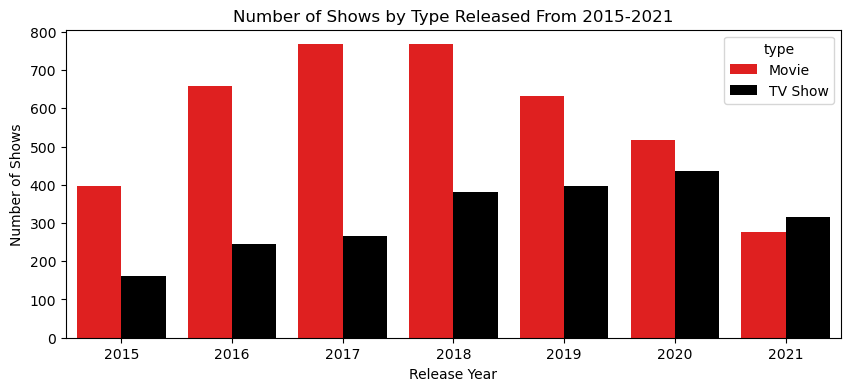

In [1320]:
extract = data_final.loc[data_final["release_year"]>=2015]
extract = extract.groupby(["release_year","type"])["show_id"].nunique().reset_index()
plt.figure(figsize=(10,4))
plt.title("Number of Shows by Type Released From 2015-2021")
sns.barplot(x="release_year",y="show_id",hue="type",data=extract, palette = ["red","black"])
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.show()

### INSIGHTS Plot 6 - So its observed from 2015 till 2021 majority of shows released were movies. Majority was released in 2017 and 2018. But for the year 2021 till available date as per dataset, more TV shows were released than movies

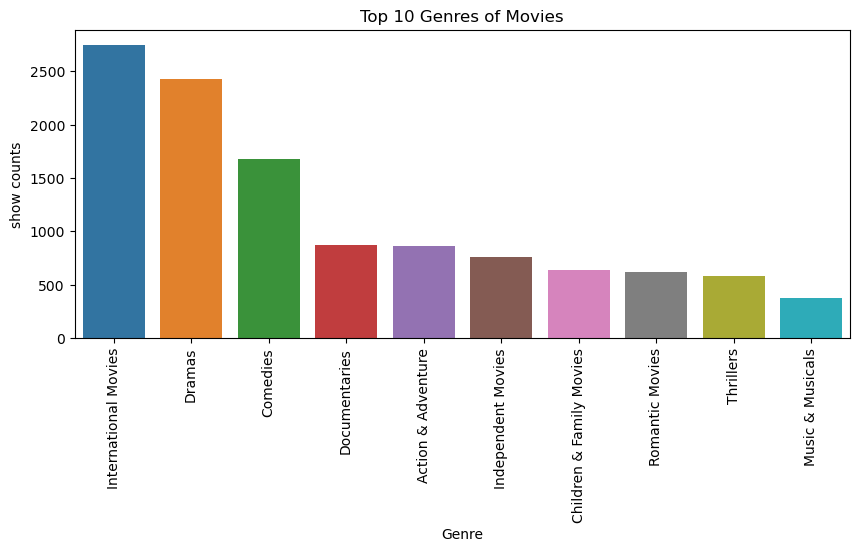

In [1321]:
top10_genre_movies = data_final.loc[data_final["type"]=="Movie"]
top10_genre_movies = top10_genre_movies.groupby("listed_in")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="listed_in",y="show_id",data=top10_genre_movies)
plt.title("Top 10 Genres of Movies")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("show counts")
plt.show()

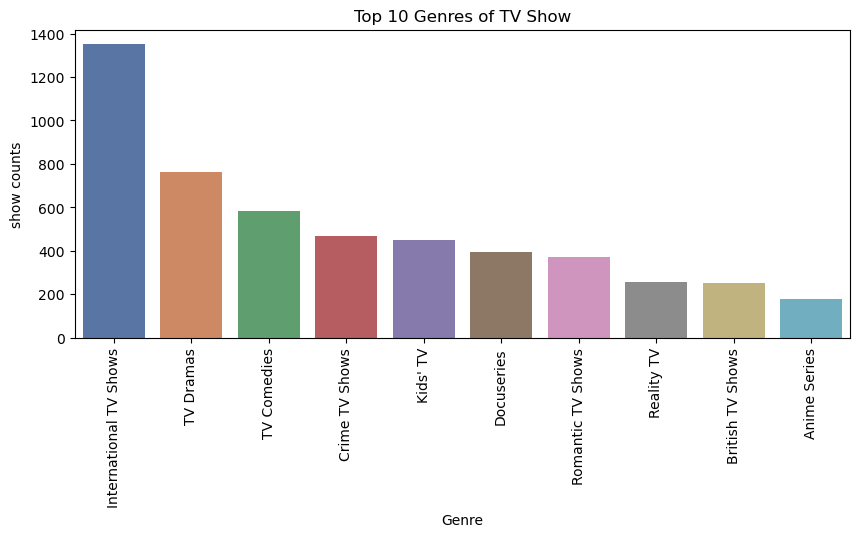

In [1322]:
top10_genre_tvshow = data_final.loc[data_final["type"]=="TV Show"]
top10_genre_tvshow = top10_genre_tvshow.groupby("listed_in")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="listed_in",y="show_id",data=top10_genre_tvshow, palette = "deep")
plt.title("Top 10 Genres of TV Show")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("show counts")
plt.show()

### INSIGHTS Plot 7 & 8 - Among the movies, international movies are the most prevalent genre, followed by dramas. Similarly, among TV shows, international TV shows dominate, followed by TV dramas.

*************************************************************************************************************************

### Using string slicing, extracting the day,month and year from the date_added column to make consistent format and converting into datetime format. date_added column is the date the show added into Netflix platform

In [1323]:
# Remove leading and trailing white spaces
data_final.loc[:,'date_added'] = data_final['date_added'].str.strip()

In [1324]:
#taking the month from date
data_final.loc[:,"month"] = data_final["date_added"].str[:3]

In [1325]:
#taking the year from date
data_final.loc[:,"year"] = data_final["date_added"].str[-4:]

In [1326]:
#taking day from the date
data_final.loc[:,"day"] = data_final["date_added"].str.split(" ").str[1].str[:-1]

In [1327]:
data_final["day"].unique()

array(['25', '24', '23', '22', '21', '20', '19', '17', '16', '15', '14',
       '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '31',
       '29', '28', '27', '26', '18', '13', '12', '30', '01,201', '01,200'],
      dtype=object)

In [1328]:
data_final["month"].unique()

array(['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan',
       'Dec', 'Nov', 'Oct'], dtype=object)

In [1329]:
data_final["year"].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2003', '2010'],
      dtype=object)

In [1330]:
#replacing the two unique values in day column with their respective day
condition3 = (data_final["day"] =="01,201") | (data_final["day"]=="01,200")
data_final.loc[condition3,"day"] = "1"

In [1331]:
data_final["day"].unique()

array(['25', '24', '23', '22', '21', '20', '19', '17', '16', '15', '14',
       '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '31',
       '29', '28', '27', '26', '18', '13', '12', '30'], dtype=object)

In [1332]:
#joining all date as new single date and in right format
data_final.loc[:,"date"] = data_final["day"] +"-"+ data_final["month"]+"-"+data_final["year"]

In [1333]:
data_final.head()

,show_id,type,date_added,release_year,rating,duration,description,title,listed_in,country,director,cast,month,year,day,date
0,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentaries,United States,Kirsten Johnson,Unknown Cast,Sep,2021,25,25-Sep-2021
1,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Ama Qamata,Sep,2021,24,24-Sep-2021
2,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Khosi Ngema,Sep,2021,24,24-Sep-2021
3,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Gail Mabalane,Sep,2021,24,24-Sep-2021
4,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Blood & Water,International TV Shows,South Africa,Unknown Director,Thabang Molaba,Sep,2021,24,24-Sep-2021


************************************************************************************************************************

## Analysis on date_added column- New column "year" is the year which shows added

In [1334]:
netflix_added = data_final.groupby("year")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)
netflix_added

,year,show_id
12,2019,2016
13,2020,1879
11,2018,1650
14,2021,1498
10,2017,1188
9,2016,430
8,2015,84
7,2014,24
4,2011,13
6,2013,12


### INSIGHTS Observation 1 - We notice that from the year 2016 onwards more shows started getting added to Netflix. So lets filter the data from 2016 till 2021

In [1338]:
netflix_added1 = data_final.groupby(["year","type"])["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)
netflix_added1 = netflix_added1.loc[netflix_added1["year"]>="2016"]
netflix_added1

,year,type,show_id
21,2019,Movie,1424
23,2020,Movie,1284
19,2018,Movie,1237
25,2021,Movie,993
17,2017,Movie,839
24,2020,TV Show,595
22,2019,TV Show,592
26,2021,TV Show,505
20,2018,TV Show,413
18,2017,TV Show,349


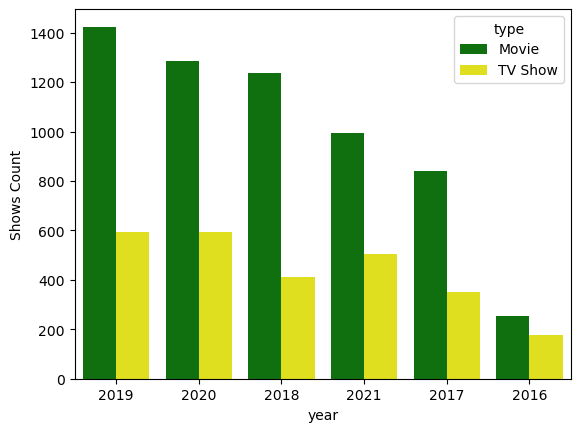

In [1339]:
sns.barplot(x="year",y="show_id",hue="type",data=netflix_added1, palette = ["green","yellow"])
plt.ylabel("Shows Count")
plt.show()

<Axes: xlabel='year', ylabel='show_id'>

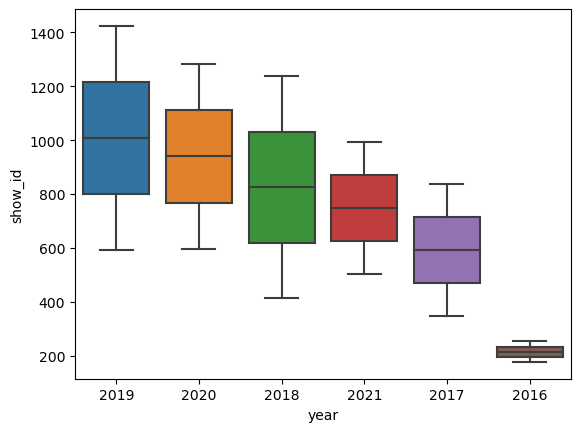

In [1340]:
sns.boxplot(x="year",y="show_id", data=netflix_added1)

### INSIGHTS Observation from Plot 9 & 10 - So from the plot its evident that 2019 is where more shows added dominating on movies compared to TV shows. So comparing year on year, the trend have increased for both movies and TV shows, with movies dominating the most on every year.

### Lets observe on what type of genre and on which months of the year where more movies and tv shows were released or added in netflix from 2016 till 2021

In [1342]:
shows_from_2016 = data_final.loc[data_final["year"]>="2016"]

In [1343]:
movies = shows_from_2016.loc[shows_from_2016["type"]=="Movie"]
movies = movies.groupby(["listed_in","month"])["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)
movies.head(10)

,listed_in,month,show_id
132,International Movies,Apr,265
142,International Movies,Oct,257
139,International Movies,Mar,254
134,International Movies,Dec,249
137,International Movies,Jul,244
138,International Movies,Jun,240
133,International Movies,Aug,238
91,Dramas,Mar,235
89,Dramas,Jul,233
143,International Movies,Sep,233


In [1344]:
tvshows = shows_from_2016.loc[shows_from_2016["type"]=="TV Show"]
tvshows = tvshows.groupby(["listed_in","month"])["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)
tvshows.head(10)

,listed_in,month,show_id
59,International TV Shows,Dec,139
62,International TV Shows,Jul,135
58,International TV Shows,Aug,131
63,International TV Shows,Jun,130
57,International TV Shows,Apr,127
66,International TV Shows,Nov,110
64,International TV Shows,Mar,108
68,International TV Shows,Sep,104
67,International TV Shows,Oct,102
65,International TV Shows,May,91


###  INSIGHTS Observation: Between 2016 and 2021, the majority of content added consists of international movies across all months for the movie category and international TV shows for the TV show category. This indicates a strong preference among the audience for international movies, while international TV shows are favored in the TV show category.

## Analysis of top 10 actors/directors of different types of shows/movies.

In [1345]:
actors = data_final.groupby("cast")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(11)
actors.drop(34214,inplace=True) #dropped the unknown cast
actors #top10 actors

,cast,show_id
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
846,Akshay Kumar,30
35881,Yuki Kaji,29
25782,Paresh Rawal,28


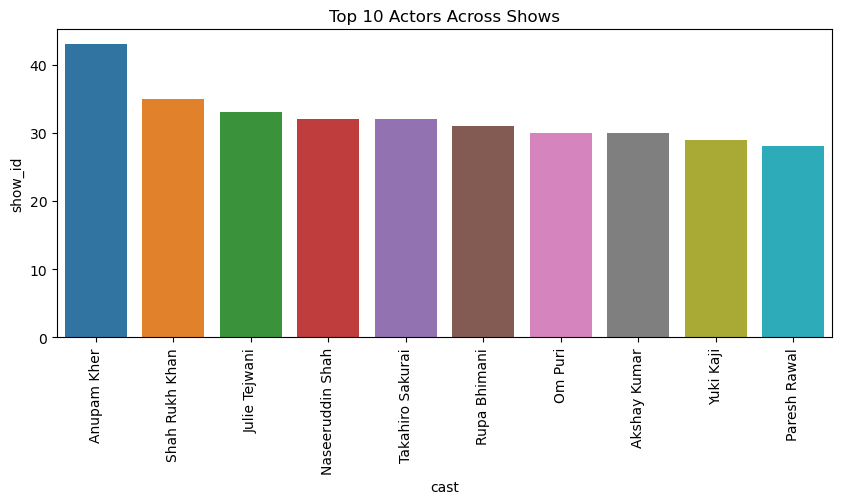

In [1346]:
plt.figure(figsize=(10,4))
sns.barplot(x="cast",y="show_id",data=actors)
plt.title("Top 10 Actors Across Shows")
plt.xticks(rotation=90)
plt.show()

In [1347]:
directors = data_final.groupby("director")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(11)
directors.drop(4744,inplace=True) #dropped the unknown director
directors #top 10 directors

,director,show_id
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
1951,Jay Chapman,12
2945,Martin Scorsese,12
4942,Youssef Chahine,12


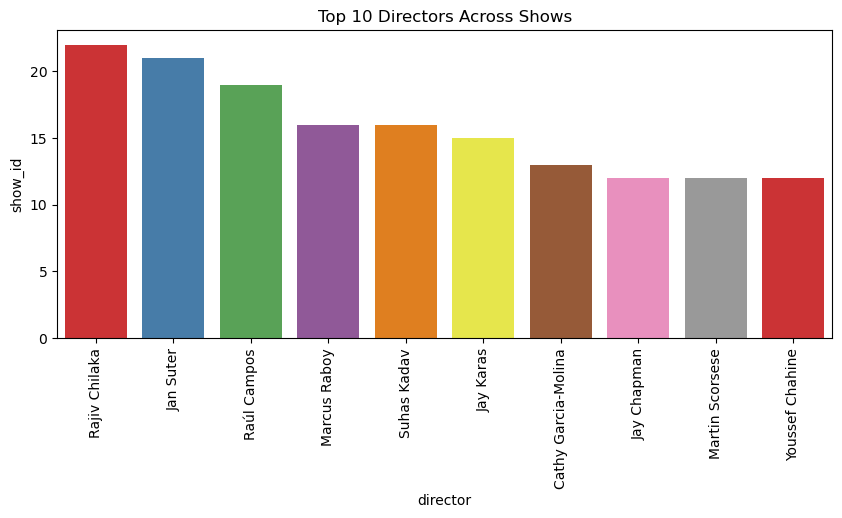

In [1348]:
plt.figure(figsize=(10,4))
sns.barplot(x="director",y="show_id",data=directors, palette = "Set1")
plt.title("Top 10 Directors Across Shows")
plt.xticks(rotation=90)
plt.show()

***************************************************************************************************************

### TV SHOWS WITH MOST SEASONS

In [1349]:
most_seasons = data_final.loc[data_final["type"]=="TV Show"]
most_seasons["duration"].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [1350]:
most_seasons = most_seasons.loc[(most_seasons["duration"]=="17 Seasons")| (most_seasons["duration"]=="15 Seasons")| (most_seasons["duration"]=="13 Seasons")]

most_seasons["title"].unique()

array(["Grey's Anatomy", 'Heartland', 'Supernatural',
       'COMEDIANS of the world', 'NCIS', 'Red vs. Blue'], dtype=object)

## Top 5 Country where shows added between 2016 till 2021

In [1197]:
top5 = data_final.loc[data_final["year"]>=2016]
top5 = top5.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(5)
top5

,country,show_id
117,United States,4404
45,India,1046
115,United Kingdom,791
21,Canada,435
36,France,382


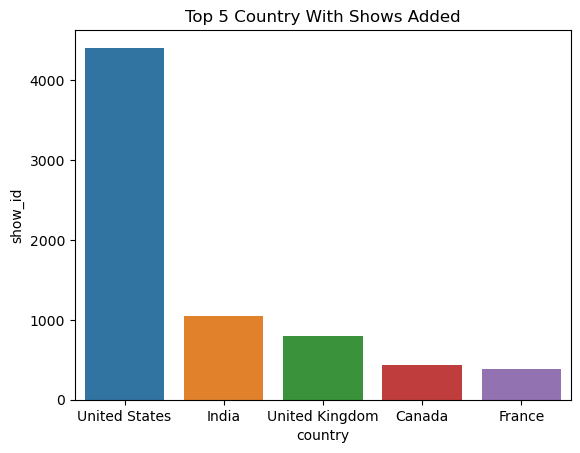

In [1224]:
sns.barplot(x="country",y="show_id",data=top5)
plt.title("Top 5 Country With Shows Added")
plt.show()

### INSIGHTS Observation: So its from USA and India where most shows got added into Netflix followed by UK,Canada and France

********************************************************************************************************************

### Launch of Movies and TV Shows in Netflix By Month

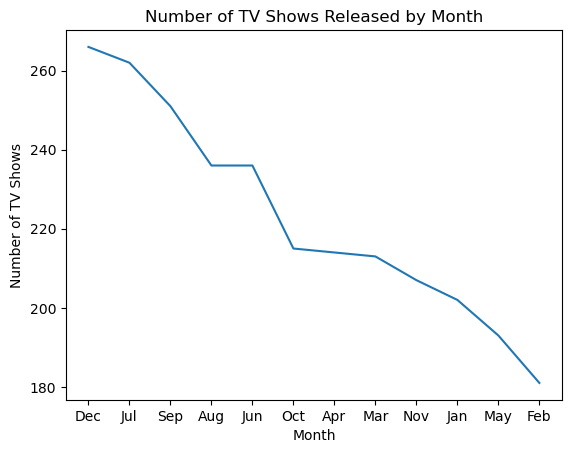

In [1363]:
tv_shows_l = data_final.loc[data_final["type"]=="TV Show"]
tv_shows_l = tv_shows_l.groupby("month")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)

sns.lineplot(x="month",y="show_id",data=tv_shows_l)
plt.xlabel("Month")
plt.ylabel("Number of TV Shows")
plt.title("Number of TV Shows Released by Month")
plt.show()

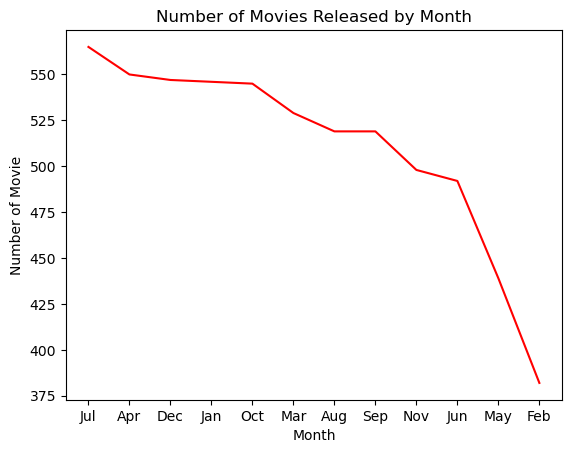

In [1365]:
movies_shows_l = data_final.loc[data_final["type"]=="Movie"]
movies_shows_l = movies_shows_l.groupby("month")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False)

sns.lineplot(x="month",y="show_id",data=movies_shows_l, color="r")
plt.xlabel("Month")
plt.ylabel("Number of Movie")
plt.title("Number of Movies Released by Month")
plt.show()

### INSIGHTS: There could be several reasons why Netflix launches more Movies & TV shows during April, July & December dominating; Feb being the month were less no of shows/movies got added.

 - December is known for the holiday season including Christmas and New Year while July often marks summer vacations and holidays in many regions. These periods typically see increased viewership as people have more time to watch shows.

- Viewership patterns may vary throughout the year, with people spending more time indoors during colder months (December) and warmer months (July). Netflix may strategically release more shows during these times to capitalize on higher viewership.

- December, April and July are often associated with major events, holidays, and promotions, providing opportunities for Netflix to market and promote their shows more effectively, potentially leading to higher engagement and viewership.

- So its clear that during holidays and vacations time were its optimal to add more shows into the platform. 

In [1389]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201936 non-null  object
 1   type          201936 non-null  object
 2   date_added    201936 non-null  object
 3   release_year  201936 non-null  int64 
 4   rating        201936 non-null  object
 5   duration      201936 non-null  object
 6   description   201936 non-null  object
 7   title         201936 non-null  object
 8   listed_in     201936 non-null  object
 9   country       201936 non-null  object
 10  director      201936 non-null  object
 11  cast          201936 non-null  object
 12  month         201936 non-null  object
 13  year          201936 non-null  Int64 
 14  day           201936 non-null  Int64 
 15  date          201936 non-null  object
dtypes: Int64(2), int64(1), object(13)
memory usage: 25.0+ MB


In [1380]:
data_final["year"] = data_final["year"].astype("Int64")

In [1384]:
data_final["day"] = data_final["day"].astype("Int64")

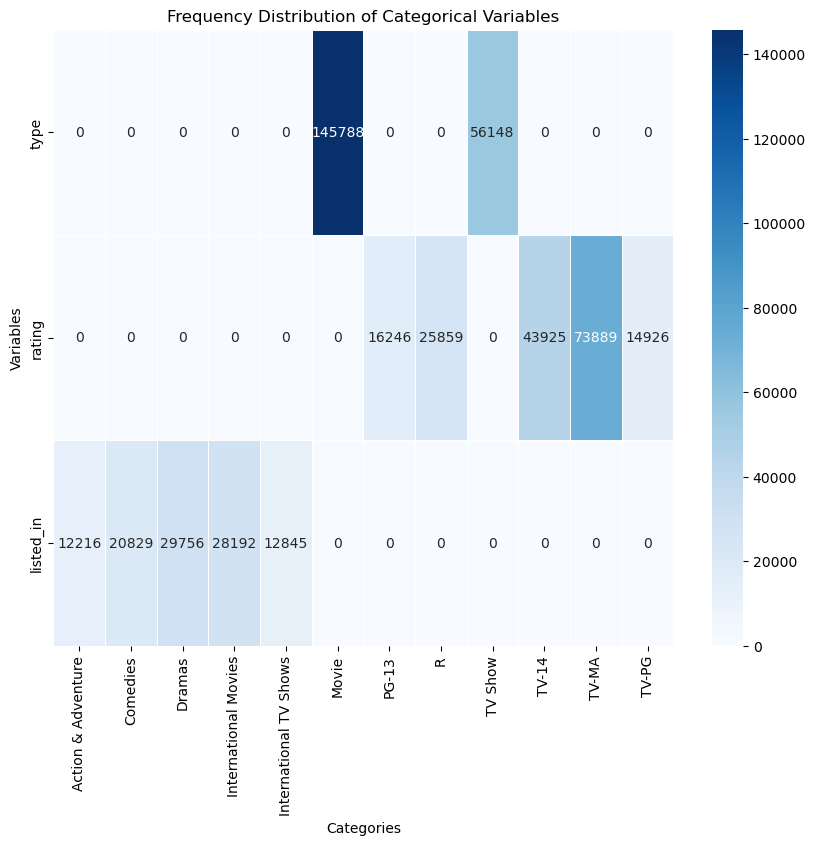

In [1403]:
categorical_variables = ['type', 'rating', 'listed_in']

# Compute the frequency of each combination of categories.
frequency_table = data_final[categorical_variables].apply(lambda x: x.value_counts()[:5]).T.fillna(0)


plt.figure(figsize=(10, 8))
sns.heatmap(frequency_table, annot=True, fmt='g', cmap='Blues', linewidths=0.5)
plt.title('Frequency Distribution of Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('Variables')
plt.show()

## Recommendations based on the insights and observations:

1. The platform sees a higher addition of movies compared to TV shows. To expand viewership, it's imperative to prioritize the release of international movies and TV shows.
2. With a significant portion of content originating from the USA and India, there's a clear opportunity to capitalize on these regions. Additionally, exploring content from emerging markets like the UK, Canada, and Korean shows could further diversify the platform's offerings.
3. Leveraging seasonal trends, potential to boost engagement by strategically releasing more content during winter and vacation periods when audiences have more leisure time for entertainment.
4. Analyzing the top 10 actors and directors whose content is not yet available on the platform presents an opportunity to attract their fan bases and expand viewership.
5. Investing in Netflix original content production and collaborations with top actors and directors as per insights